In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.morphology import binary_erosion,rectangle,binary_dilation,disk,closing,square,skeletonize
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [3]:

pathImg="C:/Users/Tobar/Desktop/TFG_DietaPorDientes/TrabajosPasadosPorJose/dietaJose/Automatico/"
nombreImg="ATP10 UE23 H1 2ori.jpg"

img = io.imread(pathImg+nombreImg)
from skimage.color import rgb2grey
img=rgb2grey(img)

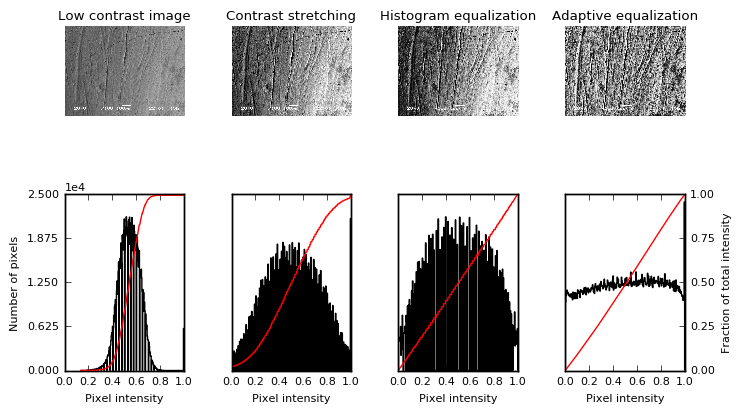

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8

def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf



# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.83)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2,4), dtype=np.object)
axes[0,0] = fig.add_subplot(2, 4, 1)
for i in range(1,4):
    axes[0,i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0,4):
    axes[1,i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.subplots_adjust(wspace=0.4)
plt.show()

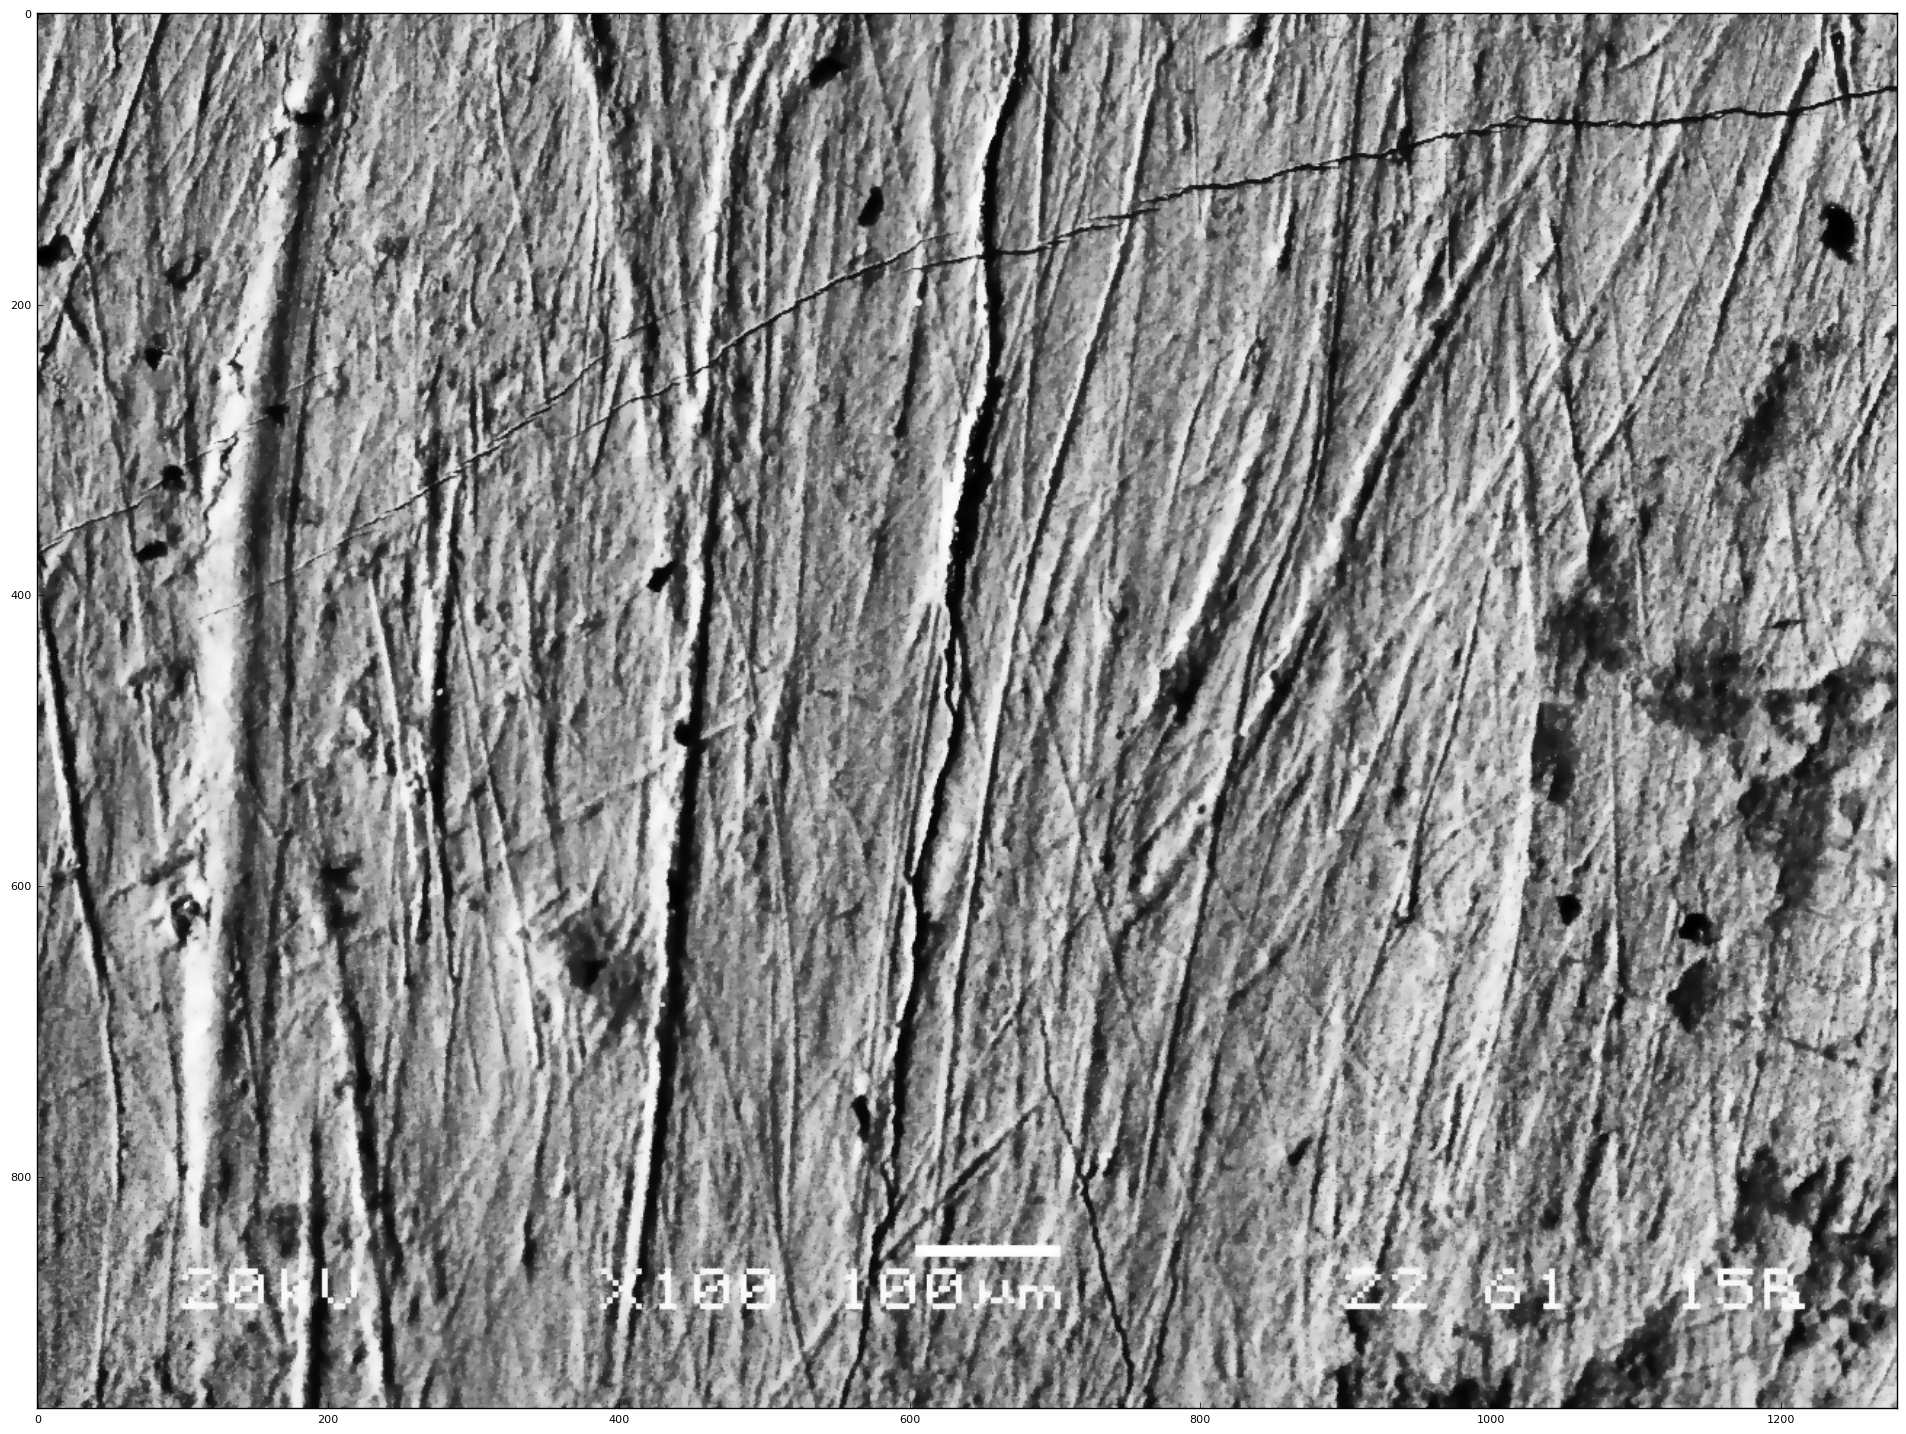

In [6]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage import exposure

img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.91,nbins =100)
img_adapteqDENO=denoise_tv_chambolle(img_adapteq, weight=0.1)


plt.figure(figsize=(24, 24))
plt.imshow(img_adapteqDENO,cmap='gray')

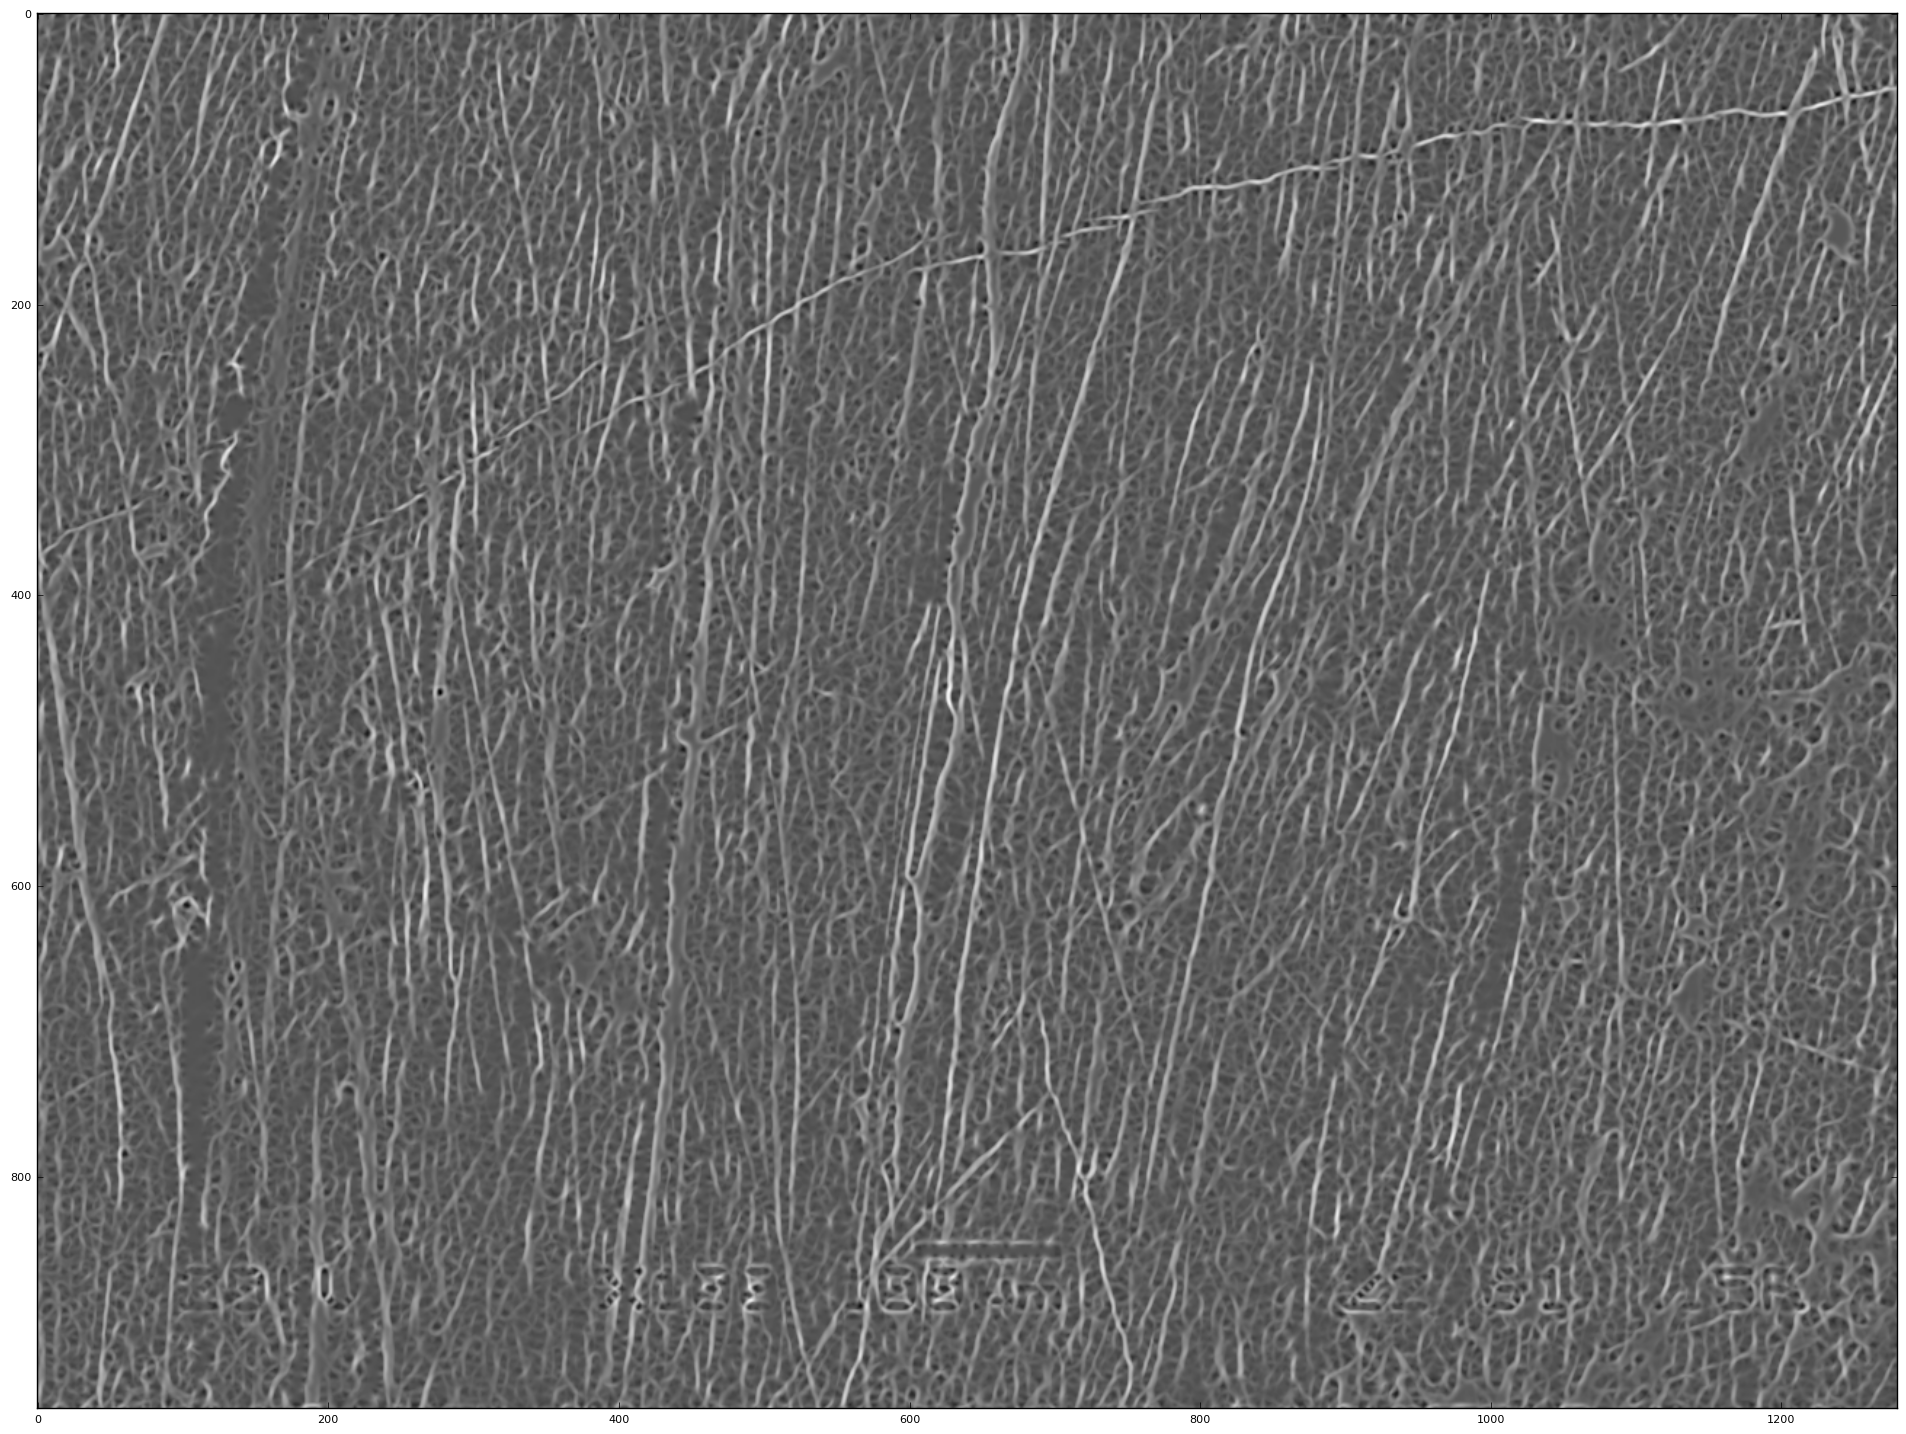

In [7]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage.color import rgb2grey
#assume you have an image img
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage import exposure

img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.91,nbins =100)
img_adapteqDENO=denoise_tv_chambolle(img_adapteq, weight=0.1)

hxx, hxy, hyy = hessian_matrix(img_adapteqDENO, sigma=1.85,mode='wrap',cval=0.11)
i1, i2 = hessian_matrix_eigvals(hxx, hxy, hyy)

#i2 is the variable you want.

#Visualise the result

plt.figure(figsize=(24, 24)) 
plt.imshow(i1,cmap='gray')


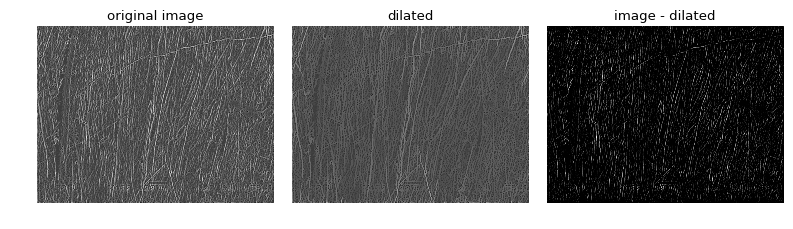

In [8]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(i1)
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5), sharex=True, sharey=True)

ax1.imshow(image,cmap='gray')
ax1.set_title('original image')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(dilated, vmin=image.min(), vmax=image.max(),cmap='gray')
ax2.set_title('dilated')
ax2.axis('off')
ax2.set_adjustable('box-forced')

ax3.imshow(image - dilated,cmap='gray')
ax3.set_title('image - dilated')
ax3.axis('off')
ax3.set_adjustable('box-forced')

fig.tight_layout()